## Project Description
The primary objective of this project is to develop regression models to predict GDP per Capita using various economic indicators. Data has been collected from over 190 countries, covering a period of 20 years. The analysis focuses on GDP per Capita as the dependent variable and several other features as independent variables, including Gross National Income, Industry Growth Rate, Inflation Rate, Population, Trade Rate, and Country. By leveraging this extensive historical data, we aim to generate insights that are both precise and actionable, enhancing our understanding of economic growth patterns and their driving factors.

Given the categorical nature of the 'Country' variable, it was necessary to convert it from string to binary format to be used effectively in the machine learning models. This was achieved using the OneHotEncoder model, which transforms the 'Country' variable into a series of binary variables, each representing the presence or absence of a specific country. This conversion ensures that the 'Country' variable can be utilized as a driving factor in our regression models, contributing to the prediction of GDP per Capita.

Initially, before including the 'Country' variable, only the Multiple Linear Regression model performed well, with other models such as Ridge, Lasso, and Elastic Net Regression showing R2R2 values below 15% to 25%. However, after incorporating the 'Country' variable, the performance of these models improved significantly, demonstrating the importance of considering categorical variables in predictive modeling.

In [37]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# load the data
df = pd.read_csv('ml.csv')
df.head()

,Gross_National_Income,Industry_growth_rate,Inflation_rate,Population,GDP_Per_Capita,Trade_Rate,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,"Country_Venezuela, RB",Country_Viet Nam,Country_Virgin Islands (U.S.),Country_West Bank and Gaza,"Country_Yemen, Rep.",Country_Zambia,Country_Zimbabwe
0,2.010516e+10,-5.0,2.0,38972230.0,512.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.435263e+10,-13.0,2.0,40099462.0,356.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.454522e+10,-6.0,2.0,41128771.0,353.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.319898e+10,-2.0,2.0,42239854.0,2233.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.185274e+10,2.0,2.0,2927519.0,4114.0,1.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
# define the target variable
y = df['GDP_Per_Capita']

# define the features
X = df.drop(['GDP_Per_Capita'], axis=1)

In [40]:
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve

# split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2
)

# Scale the features
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [41]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV

# Building Models

In [42]:
# Linear Regression Model
linear_reg = LinearRegression()

# Lasso regression model
lasso_reg = Lasso()  # Increase max_iter and adjust alpha

# Elastic Net regression model
elastic_net_reg = ElasticNet()

# Ridge regression model
ridge_reg = Ridge()

# GridSearch

In [43]:
# Parameter grids
lasso_param_grid = {'alpha': [0.1, 1, 10, 100]}
elastic_net_param_grid = {'alpha': [0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9]}
ridge_param_grid = {'alpha': [0.1, 1, 10, 100]}

##  GridSearchCV for the models below
# lasso
lasso_grid_search = GridSearchCV(lasso_reg, lasso_param_grid, cv=5, scoring='r2')

# Ridge
ridge_grid_search = GridSearchCV(ridge_reg, ridge_param_grid, cv=5, scoring='r2')

# Elastic net
elastic_net_grid_search = GridSearchCV(elastic_net_reg, elastic_net_param_grid, cv=5, scoring='r2')

In [51]:
# Fit GridSearchCV
linear_reg.fit(X_train, y_train)
lasso_grid_search.fit(X_train, y_train)
elastic_net_grid_search.fit(X_train, y_train)
ridge_grid_search.fit(X_train, y_train)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.482e+10, tolerance: 1.383e+08
  model = cd_fast.enet_coordinate_descent(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.743e+10, tolerance: 1.416e+08
  model = cd_fast.enet_coordinate_descent(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]},
             scoring='r2')

In [52]:
# Best scores and parameters
best_lasso_score = lasso_grid_search.best_score_
best_lasso_params = lasso_grid_search.best_params_

best_elastic_net_score = elastic_net_grid_search.best_score_
best_elastic_net_params = elastic_net_grid_search.best_params_

best_ridge_score = ridge_grid_search.best_score_
best_ridge_params = ridge_grid_search.best_params_

In [46]:
# Print results
# print("Best Lasso Regression Score:", best_lasso_score)
# print("Best Lasso Regression Params:", best_lasso_params)

# print("Best Elastic Net Regression Score:", best_elastic_net_score)
# print("Best Elastic Net Regression Params:", best_elastic_net_params)

# print("Best Ridge Regression Score:", best_ridge_score)
# print("Best Ridge Regression Params:", best_ridge_params)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.588e+08, tolerance: 1.920e+07
  model = cd_fast.enet_coordinate_descent(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.165e+08, tolerance: 1.511e+07
  model = cd_fast.enet_coordinate_descent(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

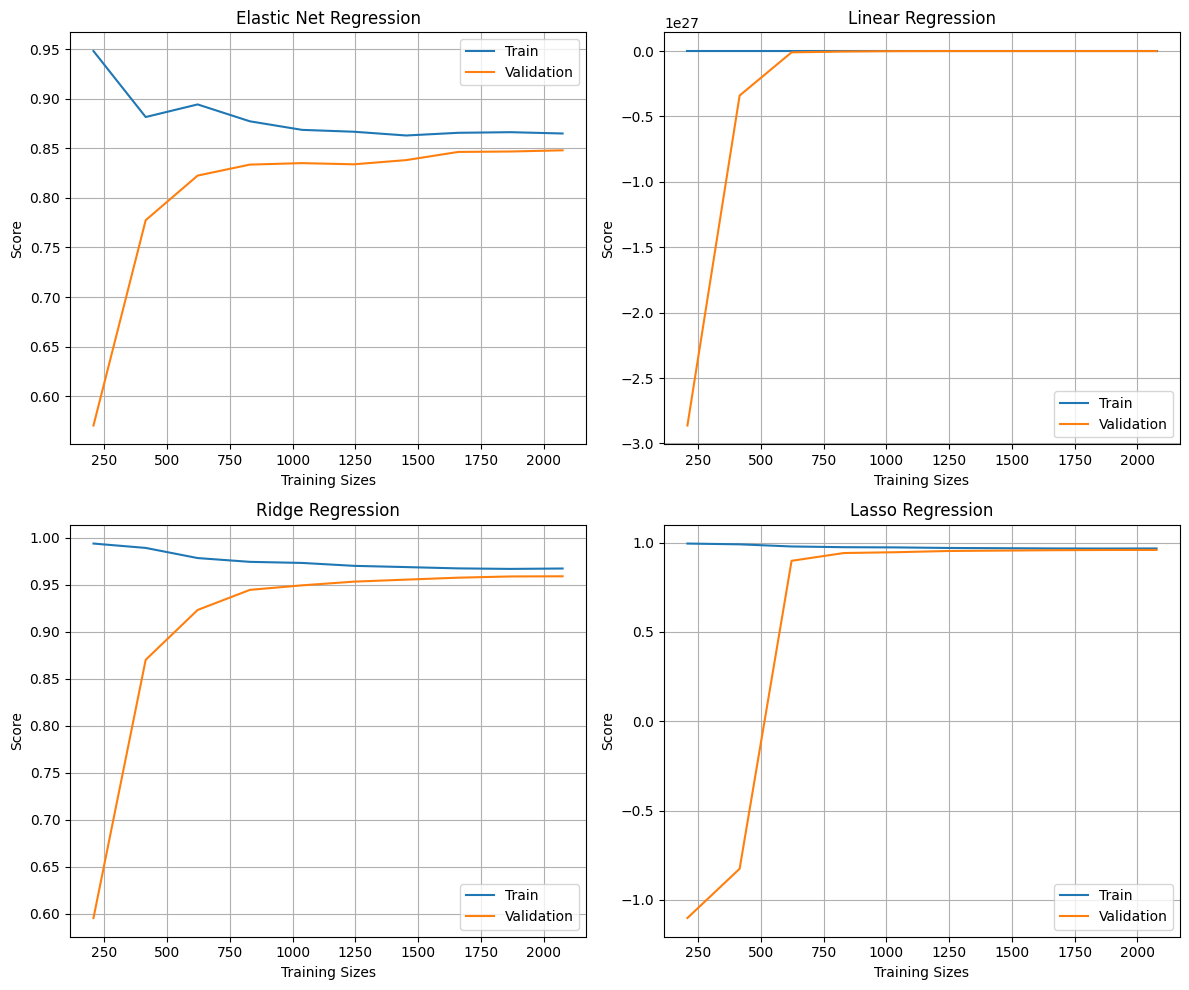

In [53]:
# Learning curve for Linear Regression
train_sizes_linear, train_scores_linear, test_scores_linear = learning_curve(linear_reg, X_train, y_train, 
                                                                             cv=5, 
                                                                             train_sizes=np.linspace(0.1, 1.0, 10))

# Learning curve for Elastic Net Regression
train_sizes_elastic, train_scores_elastic, test_scores_elastic = learning_curve(elastic_net_reg, X_train, y_train, 
                                                                                cv=5, 
                                                                                train_sizes=np.linspace(0.1, 1.0, 10))

# Learning curve for Ridge Regression
train_sizes_ridge, train_scores_ridge, test_scores_ridge = learning_curve(ridge_reg, X_train, y_train, 
                                                                          cv=5, 
                                                                          train_sizes=np.linspace(0.1, 1.0, 10))

# Learning curve for Lasso Regression
train_sizes_lasso, train_scores_lasso, test_scores_lasso = learning_curve(lasso_reg, X_train, y_train, 
                                                                          cv=5, 
                                                                          train_sizes=np.linspace(0.1, 1.0, 10))

# Plotting the learning curves in one figure with 4 subplots
plt.figure(figsize=(12, 10))

# Subplot for Elastic Net Regression
plt.subplot(2, 2, 1)
plt.plot(train_sizes_elastic, train_scores_elastic.mean(axis=1), label='Train')
plt.plot(train_sizes_elastic, test_scores_elastic.mean(axis=1), label='Validation')
plt.xlabel('Training Sizes')
plt.ylabel('Score')
plt.title('Elastic Net Regression')
plt.legend()
plt.grid(True)

# Subplot for Linear Regression
plt.subplot(2, 2, 2)
plt.plot(train_sizes_linear, train_scores_linear.mean(axis=1), label='Train')
plt.plot(train_sizes_linear, test_scores_linear.mean(axis=1), label='Validation')
plt.xlabel('Training Sizes')
plt.ylabel('Score')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)

# Subplot for Ridge Regression
plt.subplot(2, 2, 3)
plt.plot(train_sizes_ridge, train_scores_ridge.mean(axis=1), label='Train')
plt.plot(train_sizes_ridge, test_scores_ridge.mean(axis=1), label='Validation')
plt.xlabel('Training Sizes')
plt.ylabel('Score')
plt.title('Ridge Regression')
plt.legend()
plt.grid(True)

# Subplot for Lasso Regression
plt.subplot(2, 2, 4)
plt.plot(train_sizes_lasso, train_scores_lasso.mean(axis=1), label='Train')
plt.plot(train_sizes_lasso, test_scores_lasso.mean(axis=1), label='Validation')
plt.xlabel('Training Sizes')
plt.ylabel('Score')
plt.title('Lasso Regression')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [54]:

# Predictions on the test set
y_pred_linear = linear_reg.predict(X_test)
y_pred_lasso = lasso_grid_search.best_estimator_.predict(X_test)
y_pred_elastic_net = elastic_net_grid_search.best_estimator_.predict(X_test)
y_pred_ridge = ridge_grid_search.best_estimator_.predict(X_test)



In [55]:
# R² scores
r2_linear = round(r2_score(y_test, y_pred_linear), 2)
r2_lasso = round(r2_score(y_test, y_pred_lasso), 2)
r2_elastic_net = round(r2_score(y_test, y_pred_elastic_net), 2)
r2_ridge = round(r2_score(y_test, y_pred_ridge), 2)


# RMSE scores
rmse_linear = round(root_mean_squared_error(y_test, y_pred_linear), 2)
rmse_lasso = round(root_mean_squared_error(y_test, y_pred_lasso), 2)
rmse_elastic_net = round(root_mean_squared_error(y_test, y_pred_elastic_net), 2)
rmse_ridge = round(root_mean_squared_error(y_test, y_pred_ridge), 2)

# y_test mean
y_test_mean = round(y_test.mean(), 2)

# RRMSE ratios
rrmse_linear = round(rmse_linear / y_test_mean, 2)
rrmse_lasso = round(rmse_lasso / y_test_mean, 2)
rrmse_elastic_net = round(rmse_elastic_net / y_test_mean, 2)
rrmse_ridge = round(rmse_ridge / y_test_mean, 2)

In [56]:
# Create a DataFrame with the evaluation metrics
eval_metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'ElasticNet Regression', 'Ridge Regression'],
    'y_test_mean': [y_test_mean, y_test_mean, y_test_mean, y_test_mean],
    'RMSE': [rmse_linear, rmse_lasso, rmse_elastic_net, rmse_ridge],
    'RRMSE': [rrmse_linear, rrmse_lasso, rrmse_elastic_net, rrmse_ridge],
    'R²': [r2_linear, r2_lasso, r2_elastic_net, r2_ridge]
})
eval_metrics

,Model,y_test_mean,RMSE,RRMSE,R²
0,Linear Regression,19004.09,9679.05,0.51,0.88
1,Lasso Regression,19004.09,9585.10,0.50,0.88
2,ElasticNet Regression,19004.09,8868.50,0.47,0.90
3,Ridge Regression,19004.09,9638.30,0.51,0.88


## Conclusion
Based on the analysis of the regression models, the ElasticNet Regression model demonstrates the best performance for predicting GDP per capita. The Linear Regression model had an RMSE of 9679.05, an RRMSE of 0.51, and an R2R2 value of 0.88. The Lasso Regression model performed slightly better, with an RMSE of 9585.10, an RRMSE of 0.50, and an R2R2 value of 0.88. The Ridge Regression model showed similar performance to the Linear Regression model, with an RMSE of 9638.30, an RRMSE of 0.51, and an R2R2 value of 0.88.

However, the ElasticNet Regression model outperformed the others, with the lowest RMSE of 8868.50, the lowest RRMSE of 0.47, and the highest R2R2 value of 0.90. These metrics indicate that the ElasticNet Regression model has the smallest average prediction error and explains the highest percentage of variance in the dependent variable. Therefore, the ElasticNet Regression model is the most suitable choice for predicting GDP per capita, effectively balancing the benefits of both Lasso and Ridge regressions and yielding superior performance in this context.